# Waves


In the previous parts we have dealt with mechanics essentially. Even if we have described Brownian motion, this has been done by a particular type of Newtons equation of motion, it is much like mechanics. 
Now we would like to have a look at some examples from electromagnetic waves.  At first we will not solve the wave equation, but look at some solution using the complex notion of the electric field. The special solutions are the **plane wave** and the **spherical wave**.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import pandas as pd
from numpy.random import randn
from scipy.stats import norm
from ipywidgets import Image
from time import sleep,time
from threading import Thread
from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Plane Waves

### Equations

A plane wave is given in its complex notion by 

\begin{equation}
E=E_{0}e^{i\vec{k}\cdot \vec{r}}e^{-i\omega t}
\end{equation}

where the two exponential contain an spatial and a temporal phase. We will include in the following the spatial and the temporal phase. For plotting just the spatial variation of the electric field, we may just use the spatial part of the equation

\begin{equation}
E=E_{0}e^{i\vec{k}\cdot \vec{r}}
\end{equation}

But since we also want to see the wave propagate, we will directly include also the temporal dependence on our function. In all of the examples below we set the amplitude of the wave $E_{0}=1$. 

In [168]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

To describe the electromagnetic wave we need to define a wavevector $\vec{k}$, which can be in general complex valued. 


\begin{equation}
\vec{k}=
\begin{pmatrix}
k_{x}^{\prime}+ik_{x}^{"} \\
k_{y}^{\prime}+ik_{y}^{"} \\
k_{z}^{\prime}+ik_{z}^{"} \\
\end{pmatrix}
\end{equation}

The real part of the wavevector is describing the propagation of the wave, while the imaginary part is related to a damping of the electric field with distance. We can define an array with complex values in the following way:

In vacuum, the wavevector is just real 

\begin{equation}
\vec{k}_{0}=
\begin{pmatrix}
k_{0x} \\
k_{0y}\\
k_{0z}\\
\end{pmatrix}
\end{equation}


In a medium, however, the wavevector can be imaginary due to the fact that the refractive index $n$ could be a complex number $n=\eta+i\kappa$. The complex number of the refractive index means, that there is some damping of the electromagnetic wave due to absorption, for example.

In [190]:
wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))

eta=1
kappa=0
n=eta+kappa*1j

k=n*k0*vec


The real part of the wavevector is related to the wavelength of the electromagnetic wave. 

\begin{equation}
k=\frac{2\pi }{\lambda}=\eta\frac{2\pi}{\lambda_{0}}
\end{equation}

We can plot the electric field in the x-z plane by defining a grid of points (x,z). This is done by the *meshgrid* function of *numpy*. The meshgrid returns a 2-dimensional array for each coordinate. Have a look at the values in the meshgrid.

In [211]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)



X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

Try to plot the field amplitude with the help of the *imshow* function of matplotlib. To get the axes of a image plot right, you have to use the *extent* keyword

~~~
extent=(xmin,xmax,ymin,ymax)
~~~

in the *imshow* command.




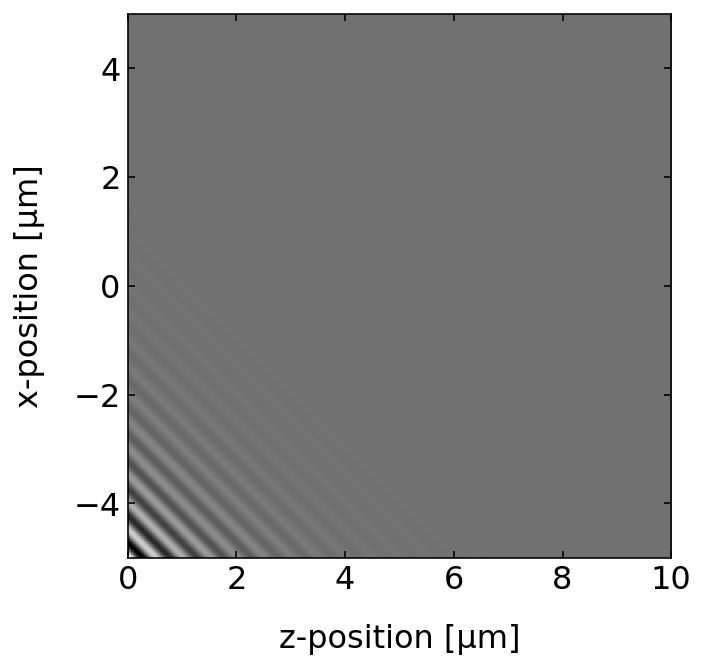

In [268]:
plt.figure(figsize=(5,5))
field=plane_wave(k,omega0,r,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent,cmap='gray')

plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')
plt.show()

### Plane wave propagation

The above graph shows a static snapshot of the plane wave. We know, however, that a plane wave is propagating in space and time. 
Since we know how to animate things, we may do that using the `ipycanvas` module.

In [269]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

In [270]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

This is our animation function, where I provide time and the wavevector as arguments, such that we may change both parameters easily.

In [248]:
def animate(k,time):
    for t in time:
        field=plane_wave(k,omega0,r,t)
        data=np.real(field.transpose())

        data=data+1
        with hold_canvas(canvas):
            canvas.put_image_data(data*90,0,0)
        sleep(0.02)

With the call below, you may animate the wave now with different refractive indices.

In [249]:
eta=1.5
kappa=0.
n=eta+kappa*1j

k=n*k0*vec
time= np.linspace(0,1e-14,100)
animate(k,time)

### Imaginary wave vector

If we now create a material, which has an imaginary part of the refractive index, we see that the amplitude decays and the wave fades.

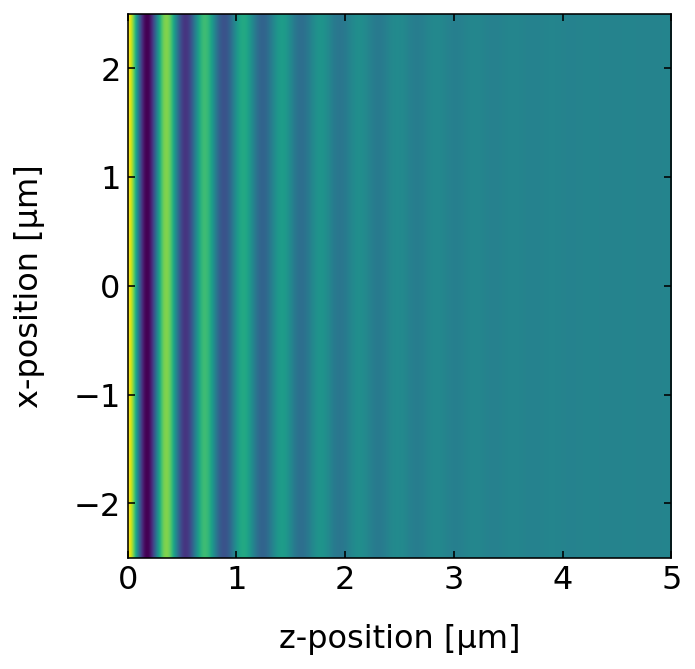

In [258]:
x=np.linspace(-2.5e-6,2.5e-6,1000)
z=np.linspace(0,5e-6,1000)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])
plt.figure(figsize=(5,5))

eta=1.5
kappa=0.1
n=eta+kappa*1j
vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k=n*k0*vec

field=plane_wave(k,omega0,r,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent)

plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')
plt.show()


The above plots show the electric field amplitude in the x-z plane. We may also have a look the field amplitude and intensity as a function of the z-position by chosing a single x-value. Note that the intensity is proportional to the electric field square $I\propto |E|^2$. This is the reason, why the intensity decays twice as fast as the field.

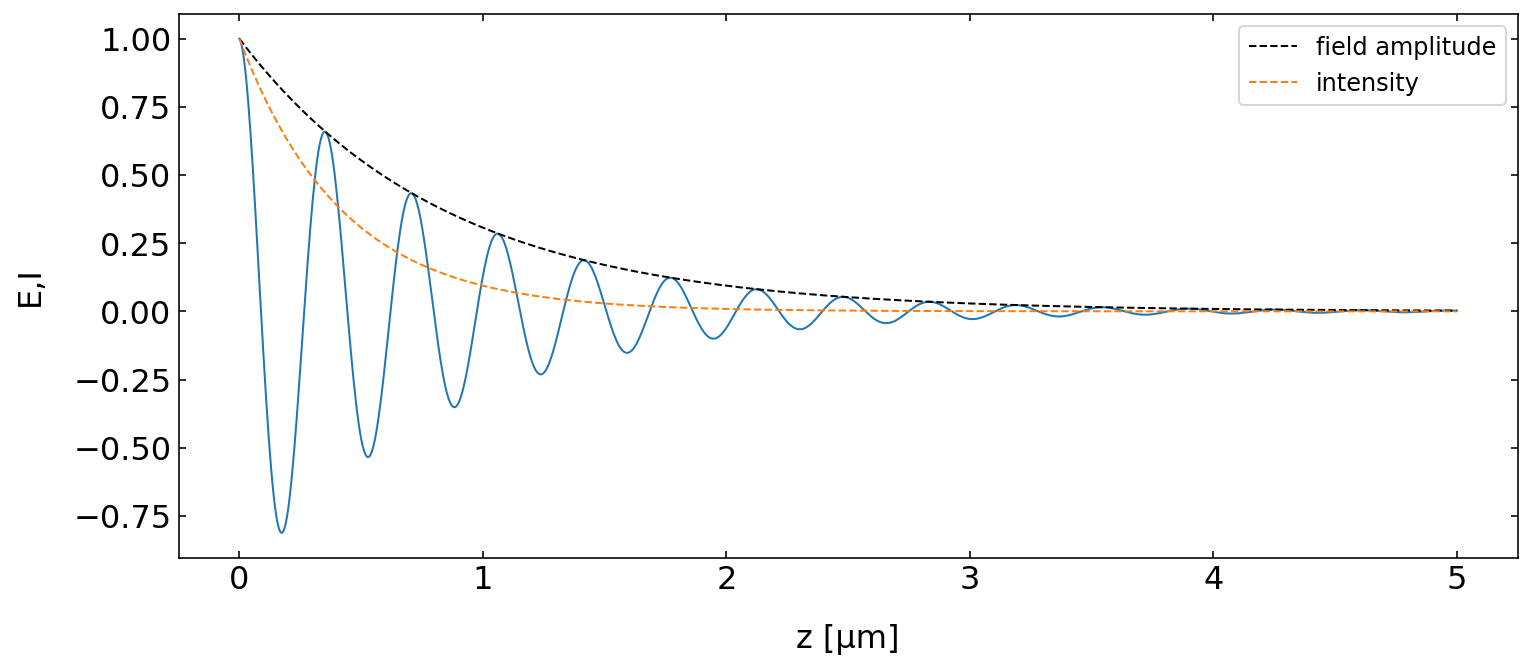

In [260]:
plt.figure(figsize=(12,5))
plt.plot(z*1e6,np.real(field[:,50]))
plt.plot(z*1e6,np.abs(field[:,50]),'k--', label='field amplitude')
plt.plot(z*1e6,np.abs(field[:,50])**2,'--',label='intensity')
plt.xlabel('z [µm]')
plt.ylabel('E,I')
plt.legend()
plt.show()

### Animation

In [261]:
display(canvas)

Canvas(height=300, image_data=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x01,\x08\x06\x00\x00\…

In [267]:
k=n*k0*vec
time= np.linspace(0,1e-14,100)
animate(k,time)

### Interference of two plane waves

<Figure size 360x360 with 0 Axes>

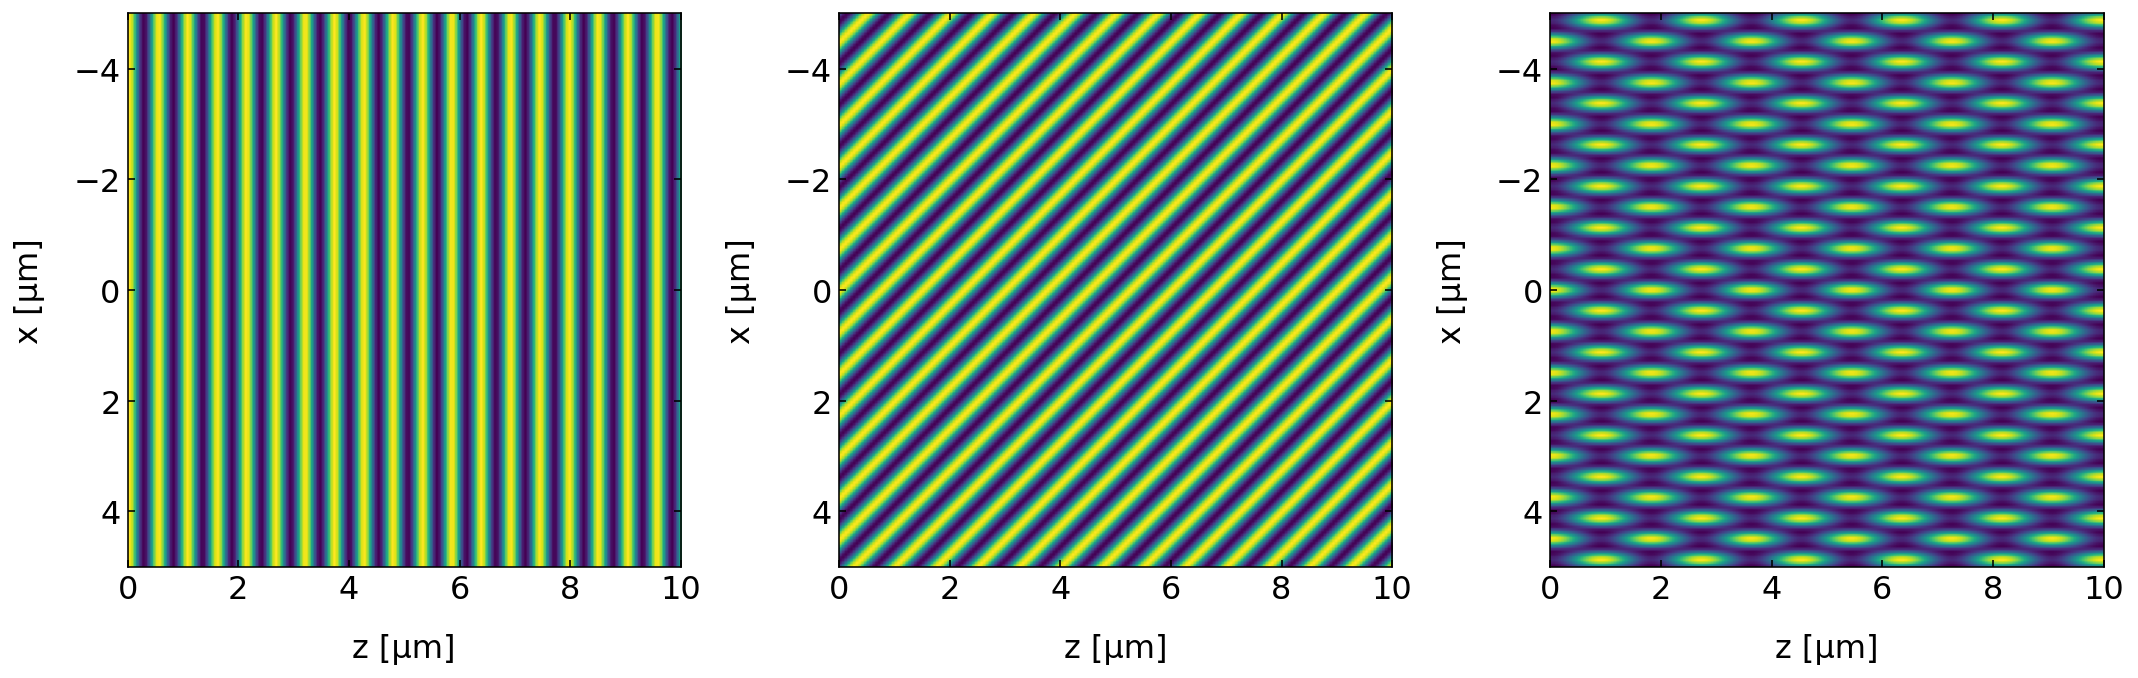

In [265]:
x=np.linspace(-5e-6,5e-6,200)
#y=np.linspace(-5e-6,5e-6,100)
z=np.linspace(0,10e-6,200)


X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

plt.figure(figsize=(5,5))
vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k1=k0*vec


vec=np.array([1,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k2=k0*vec

vec=np.array([-1,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k3=k0*vec

field1=plane_wave(k1,omega0,r,0)
field2=plane_wave(k2,omega0,r,0)
field3=plane_wave(k3,omega0,r,0)
field=field1+field2+field3

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.real(field1.transpose()),extent=extent)

plt.xlabel('z [µm]')
plt.ylabel('x [µm]')


plt.subplot(1,3,2)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.real(field2.transpose()),extent=extent)
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.subplot(1,3,3)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.abs(field.transpose())**2,extent=extent)
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.tight_layout()
plt.show()

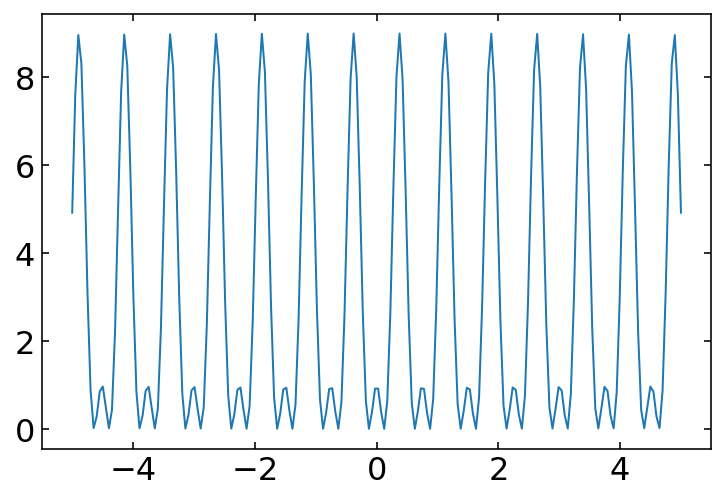

In [266]:
plt.plot(x*1e6,np.abs(field.transpose()[:,-1])**2)

### Spherical Waves

A spherical wave is given by 

\begin{equation}
E(r)=E_{0}\frac{e^{ik|\vec{r}-\vec{r}_{0}|}}{|\vec{r}-\vec{r}_{0}|}
\end{equation}

where the wave originates from the point $\vec{r}_{0}$. Note that the wavevector has now reduced to a scalar.

In [17]:
def spherical_wave(k,r,r0):
    k=np.linalg.norm(k)
    return(np.exp(1j*k*np.linalg.norm(r-r0))/np.linalg.norm(r-r0))

#### Plot the amplitude of the field as a functon of distance

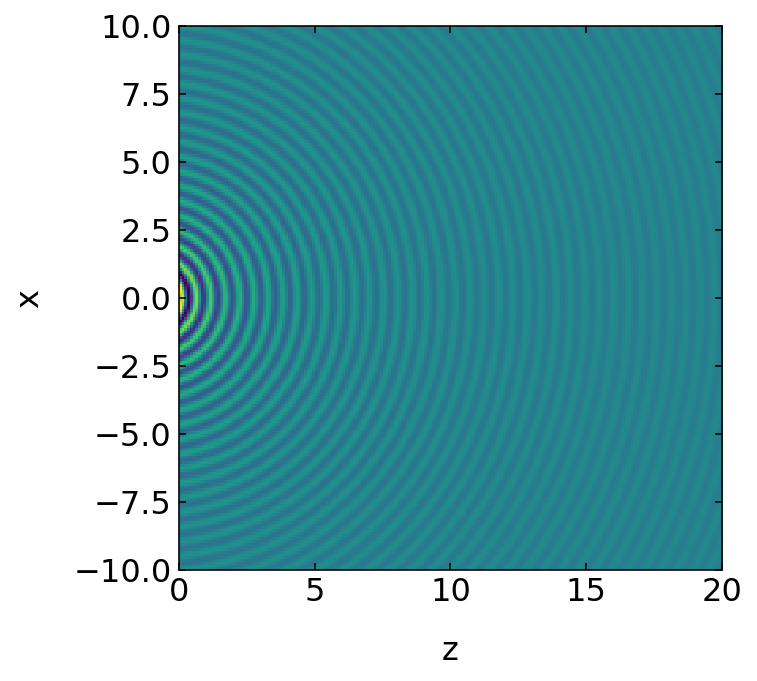

In [32]:
plt.figure(figsize=(5,5))

x=np.linspace(-10e-6,10e-6,200)
z=np.linspace(0,20e-6,200)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

k=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-1000e-9])

field=spherical_wave(k,r,r0)
#plt.contourf(Z,X,np.abs(field)**2,20)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent)

plt.xlabel('z')
plt.ylabel('x')
plt.show()

Text(0, 0.5, 'intensity [a.u.]')

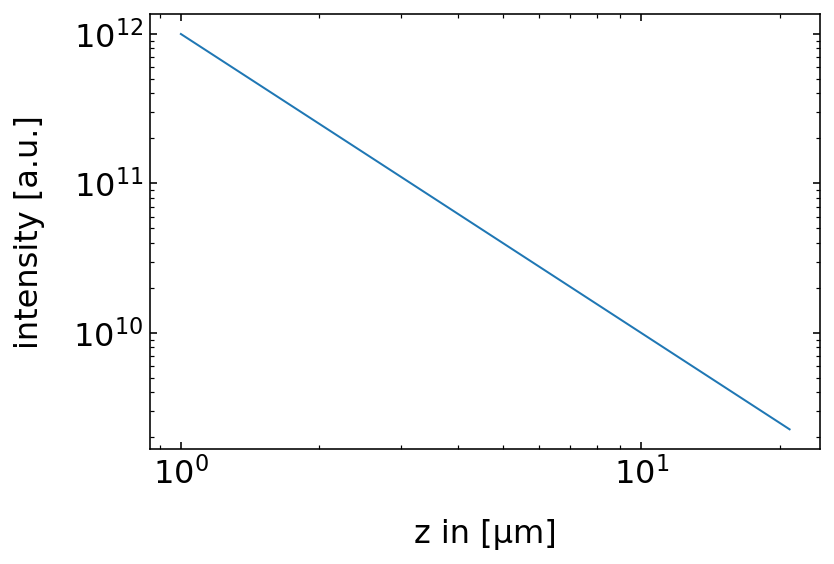

In [31]:
plt.loglog((z+1e-6)*1e6,np.abs(field.transpose()[100,:])**2)
plt.xlabel('z in [µm]')
plt.ylabel('intensity [a.u.]')

#### Plot the intensity in a plane z


We can alo plot the intensity of a spherical wave at a certain distance from the source in the xy-plane.

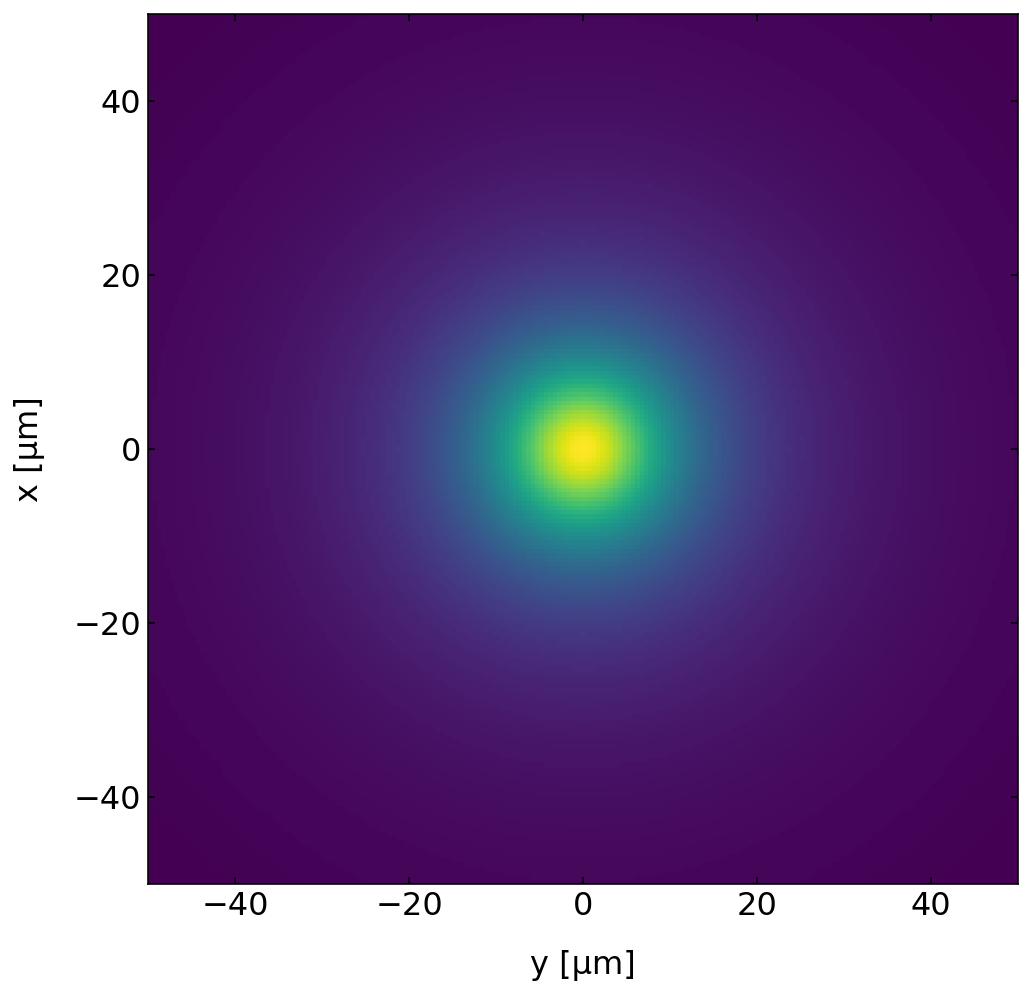

In [37]:
plt.figure(figsize=(8,8))
x=np.linspace(-50e-6,50e-6,200)
y=np.linspace(-50e-6,50e-6,200)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,10e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-20e-9])
field=spherical_wave(k1,r,r0)
cmap = plt.cm.get_cmap("jet")

#plt.contourf(Z,X,np.abs(field)**2,100)
plt.imshow(np.abs(field)**2,extent=[-50,50,-50,50])

plt.xlabel('y [µm]')
plt.ylabel('x [µm]')
plt.show()

#### Interference between a spherical and a plane wave

In [45]:
def plane_wave_phase(k,r,phi):
    return(np.exp(1j*(np.dot(k,r)+phi)))

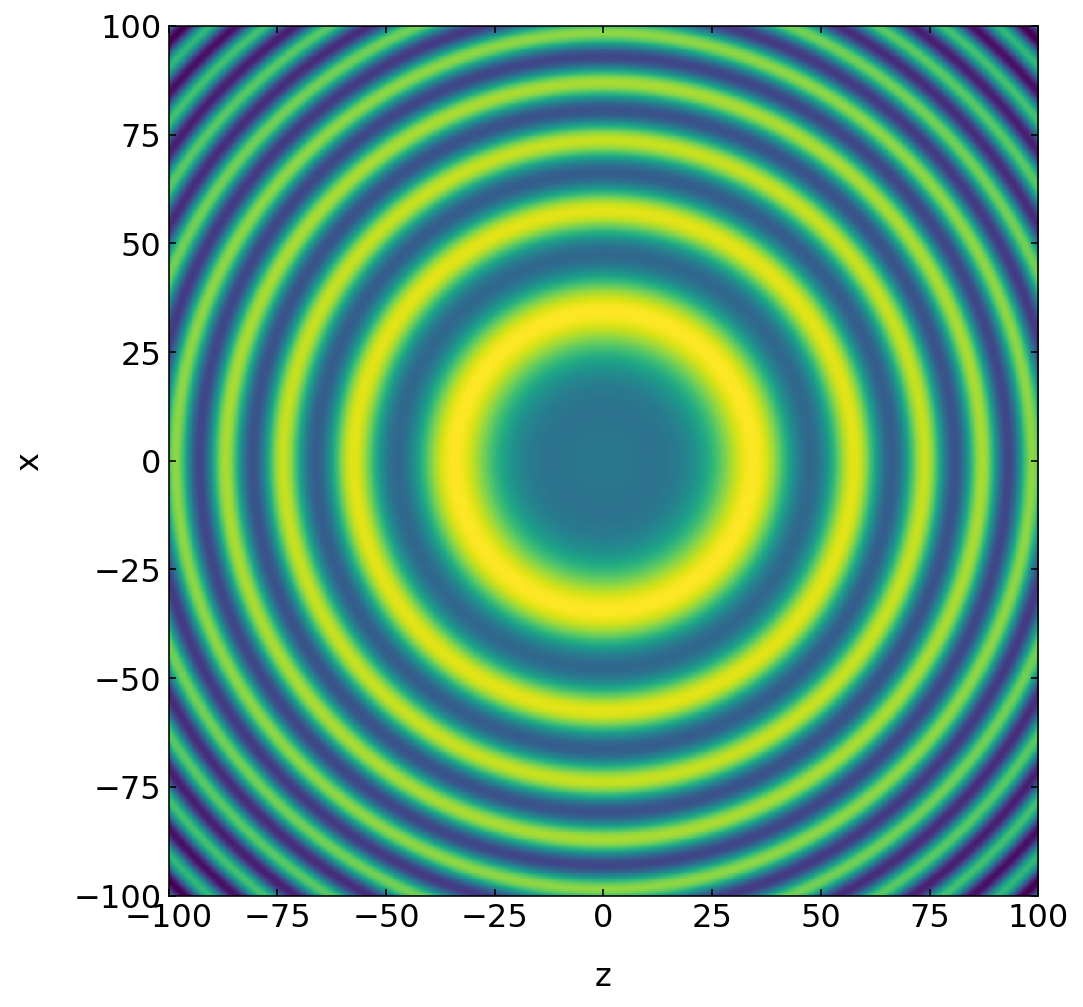

In [44]:
plt.figure(figsize=(8,8))
x=np.linspace(-100e-6,100e-6,1000)
y=np.linspace(-100e-6,100e-6,1000)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,2000e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-2e-6])

field=plane_wave(k1,r,2)+spherical_wave(k1,r,r0)
cmap = plt.cm.get_cmap("jet")

extent = np.min(y)*1e6, np.max(y)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.abs(field.transpose()),extent=extent)

plt.xlabel('z')
plt.ylabel('x')
plt.show()


### Diffraction pattern of a single slit using Huygens principle

The Huygens principle states, that each point is space which which is experiencing an electromagnetic wave is the source of a spherical wave. This means nothing else, that any wave can be expanded into a superposition of spherical waves, which is the fundamental of Mie scattering for example. Here we would like to have a look at the Huygens principle by playing around with the interference from multiple sources arranged in a line. Using this way we can simulate the diffraction patterns from a slit or a grating.

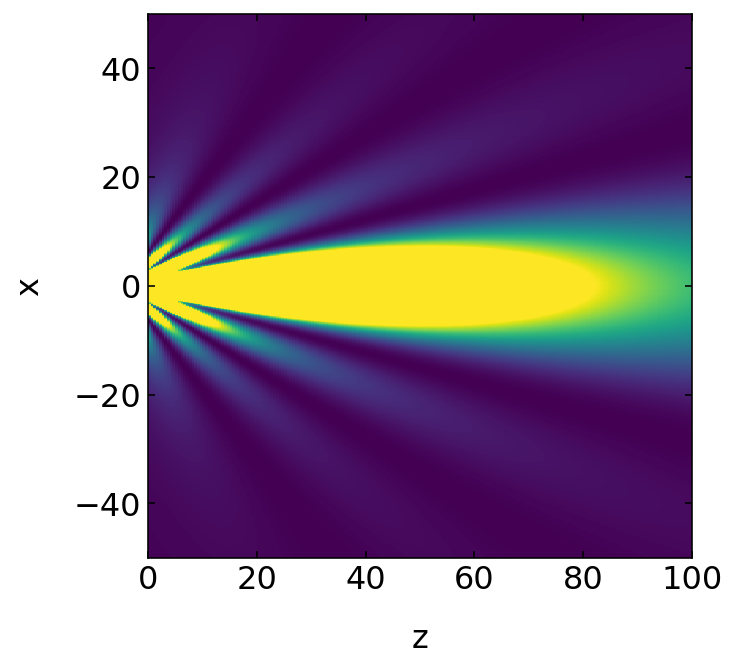

In [95]:
plt.figure(figsize=(5,5))

x=np.linspace(-50e-6,50e-6,1000)
y=np.linspace(-50e-6,50e-6,1000)
z=np.linspace(0,100e-6,200)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

k=k0*np.array([0j,0j,1+0j])

field=0
d=2e-6
for x0 in np.linspace(-d/2,d/2,100):    
    r0=np.array([x0,0,-5e-6])
    field=field+spherical_wave(k,r,r0)

field=field/np.max(field)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.abs(field.transpose())**2,extent=extent,vmin=0,vmax=0.01)

plt.xlabel('z')
plt.ylabel('x')
plt.show()

**exercise**

Plot the intensity pattern at a certain distance z and compare that to the analytical solution

\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2
\end{equation}

where 
\begin{equation}
\delta=\frac{\pi d}{\lambda}\sin(\theta)
\end{equation}

and $d$ is the slit width.

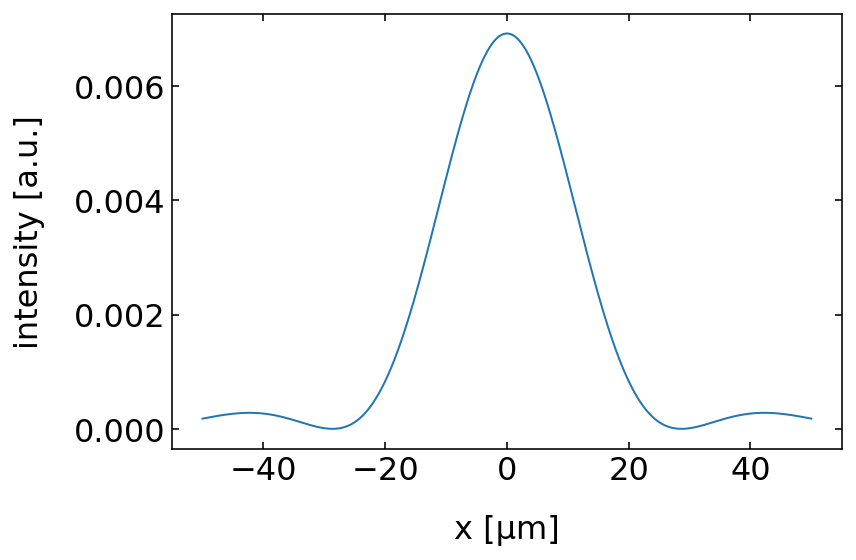

In [96]:
## code goes here

plt.plot(x*1e6,np.abs(field[199,:])**2)
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')
plt.show()

**exercise**

create the intensity pattern generated by a grating with 10 slits of width $d$ and distance $D$. Compare that to the analytical solution.

\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2\left (\frac{\sin(N\gamma)}{\sin(\gamma)}\right )^2
\end{equation}


where 
\begin{equation}
\gamma=\frac{\pi D}{\lambda}\sin(\theta)
\end{equation}

and $N$ is the number of slits.

In [80]:
## code goes here

## Gaussian Beams

A Gaussian beam is an important solution in optics as it represents a confined electromagnetic wave in form of a beam. It is the solution of the paraxial Helmholtz equation:

\begin{equation}
\left ( \frac{\partial^2 }{\partial x^2}+\frac{\partial^2 }{\partial y^2}-2ik\frac{\partial }{\partial z}\right ) E(\vec{r})=0
\end{equation}

The solution is given by 

\begin{equation}
E(r,z)=E_{0}\frac{w_0}{w(z)}e^{-\frac{r^2}{w(z)^2}}e^{-i\left [ kz+k\frac{r^2}{2R(z)} -\Psi(z)\right ]}
\end{equation}

and is the standard representation of focused beams in optics. 

In [97]:
def gaussian_beam(k,r,w0):
    zr=np.pi*w0**2*k/2/np.pi
    x=r[0]
    y=r[1]
    z=r[2]
    rho2=x**2+y**2
    w=w0*np.sqrt(1+(z/zr)**2)
    R=z*(1+(zr/z)**2)
    psi=np.arctan(z/zr)
    E=w0*np.exp(-rho2/w**2)*np.exp(-1j*(k*z+k*rho2/(2*R)-psi))/w
    return(E)

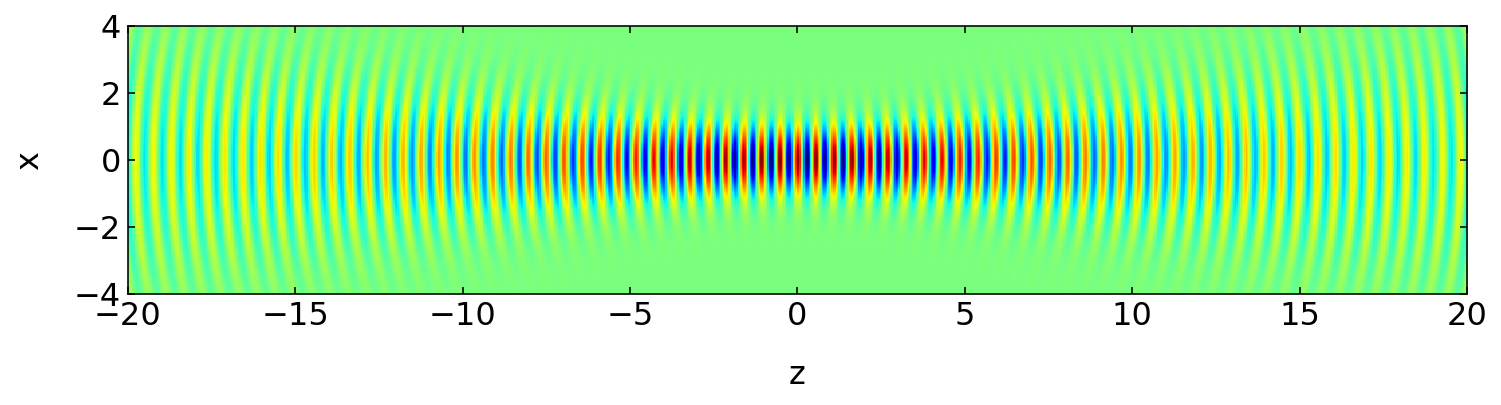

In [22]:
x=np.linspace(-4e-6,4e-6,1000)
y=np.linspace(-10e-6,10e-6,1000)
z=np.linspace(-20e-6,20e-6,1000)


#X,Y=np.meshgrid(x,y)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

plt.figure(figsize=(12,8))
field=gaussian_beam(k0,r,1e-6)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.imshow(np.real(field.transpose()),cmap='jet',extent=extent)
plt.xlabel('z')
plt.ylabel('x')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


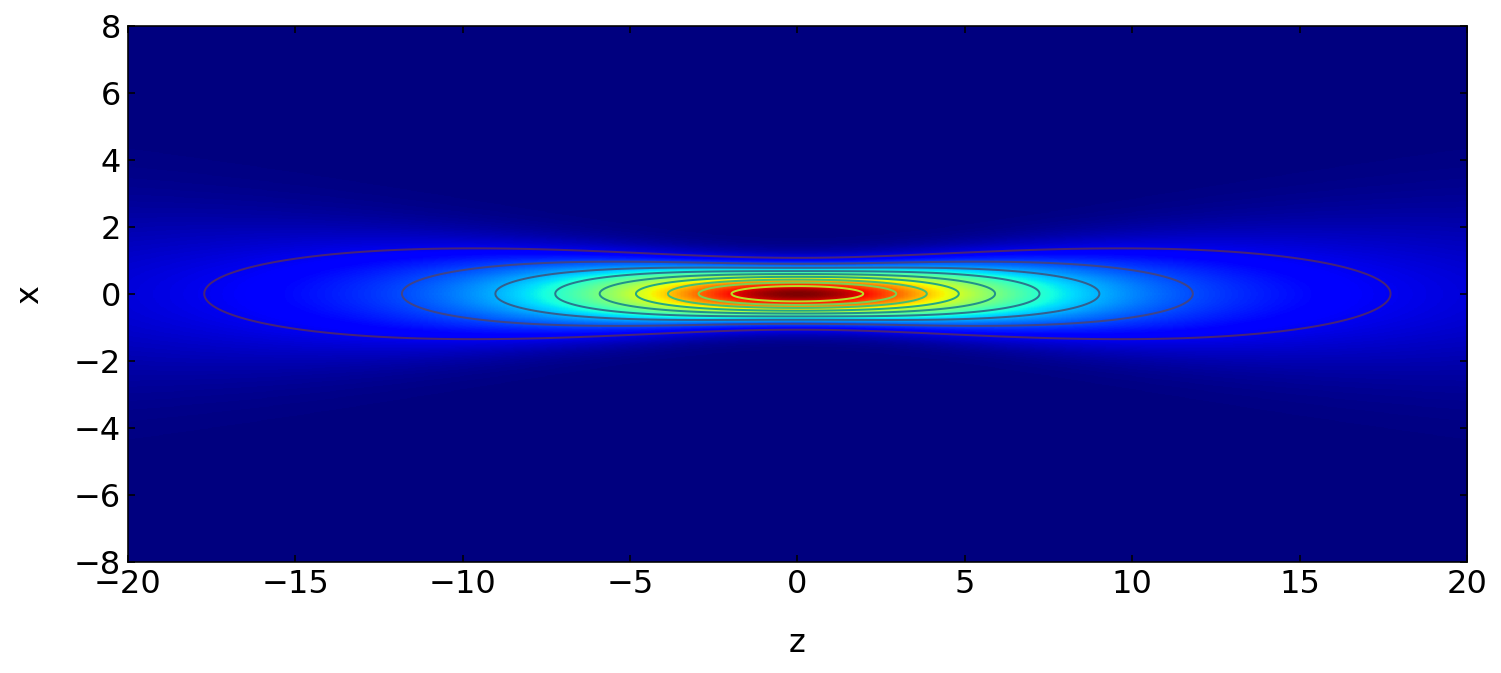

In [23]:
x=np.linspace(-8e-6,8e-6,1000)
y=np.linspace(-2e-6,2e-6,1000)
z=np.linspace(-20e-6,20e-6,1000)



#X,Y=np.meshgrid(x,y)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

plt.figure(figsize=(12,8))
field=gaussian_beam(k0,r,1e-6)


extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.imshow(np.abs(field.transpose())**2,cmap='jet',extent=extent)
plt.contour(Z*1e6,X*1e6,np.abs(field)**2,10,color='grays')

plt.xlabel('z')
plt.ylabel('x')
plt.show()

**exercise**

Try to find the width of the Gaussian beam numerically and plot it as a function of propagation distance.

In [24]:
## code goes here

A Gaussian beam is characterized by a Gaussian intensity distribution perpendicular to the optical axis. We can check that by plotting the intensity of the beam at a certain position z along the progation direction.

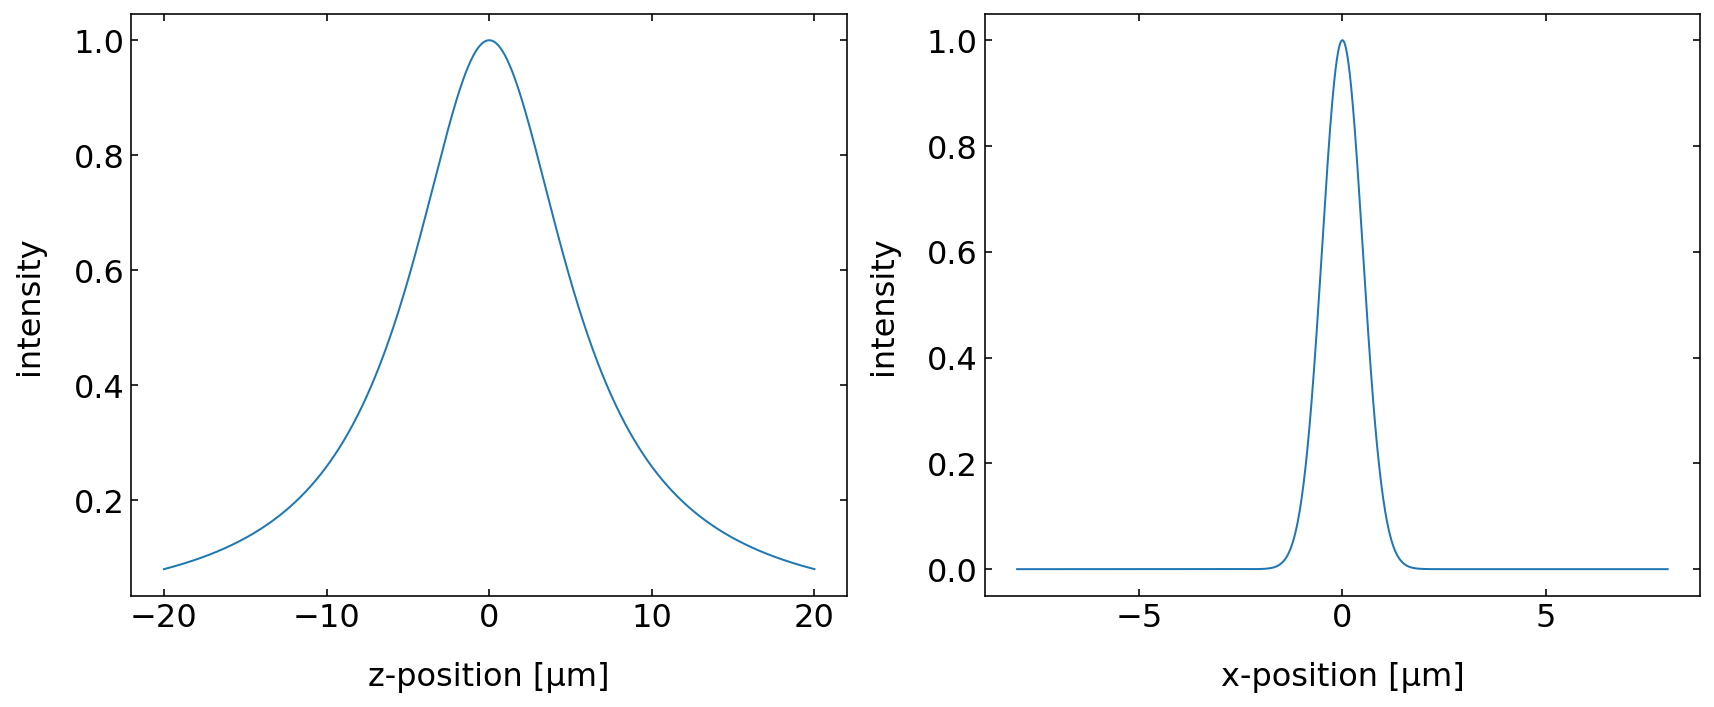

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(z*1e6,np.abs(field[:,500])**2)
plt.xlabel('z-position [µm]')
plt.ylabel('intensity')
plt.subplot(1,2,2)
plt.plot(x*1e6,np.abs(field[500,:])**2)
plt.xlabel('x-position [µm]')
plt.ylabel('intensity')
plt.tight_layout()
plt.show()

## Oscillating Dipole Field

In the case of fluorescence light emitted by a molecules for example, the radiation source is an oscillating dipole. The oscillating dipole field is given by

\begin{equation}
\vec{E}=\frac{1}{4\pi \epsilon_{0}}\left [ \frac{ k^2}{r} (\hat{r} \times \vec{p})\times \hat{r}+\left (\frac{1}{r^3}-\frac{i k}{r^2} \right )(3\hat{r}[\hat{r}\cdot \vec{p}-\vec{p}]) \right ]e^{i k r}
\end{equation}

Write a function which calculates the dipole field at a given point $r$. In a scattering problem, the dipole is excited by the electric field of a plane wave or Gaussian bea, at the position of the dipole. In the far field, the dipole electric field is interfering 

In [99]:
def dipole_wave(p,k,r):
    k=np.linalg.norm(k)
    k=1
    x=r[0]
    y=r[1]
    z=r[2]
    dr=np.sqrt(x**2+y**2+z**2)
    ex=x/dr
    ey=y/dr
    ez=z/dr
    er=np.array([ex,ey,ez])
    term1=np.cross(np.cross(er,p),er)*k**2/dr
    term2=(er*np.dot(er,p)-p)*(1/dr**3-1j*k/dr**2)
    total=(term1+term2)*np.exp(1j*k*r)
    return(total)

In [100]:
x=np.arange(-10,10,0.1)
y=np.arange(-20,20,0.1)
z=np.arange(-10,10,0.1)

p=np.array([1,0,1])

field=np.zeros([len(x),len(z)])
    
for i in range(len(x)):
    for j in range(len(z)):
            r=np.array([x[i],0,z[j]])
            f=np.abs(np.dot(dipole_wave(p,k,r),dipole_wave(p,k,r)))
            #f=(dipole_wave(p,k,r))

            if np.sqrt(x[i]**2+z[j]**2)>1.5:
                field[i,j]= f



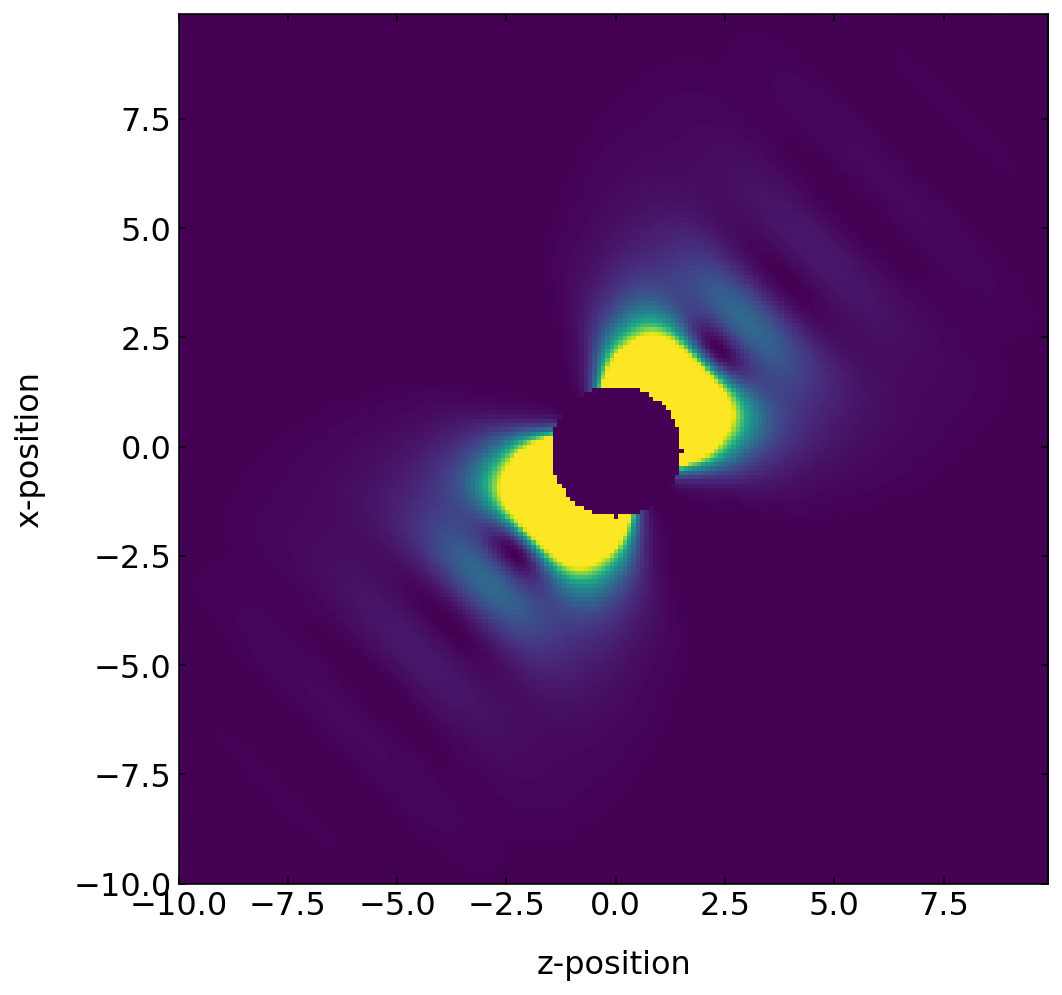

In [108]:
plt.figure(figsize=(8,8))

extent = np.min(z), np.max(z),np.min(x), np.max(x)
plt.imshow(np.abs(field)**2,extent=extent,vmax=0.03)
plt.xlabel('z-position')
plt.ylabel('x-position')
plt.show()

## Lenses

Lenses delay the phase of the electromagnetic wave depending on the distance from the optical axis. 
The delay is measured by the transmission function

\begin{equation}
t(x,y)=\exp\left ( -i k \frac{x^2+y^2}{2f}\right )
\end{equation}

where $f$ is the focal distance. 

In [113]:
def lens(k,r,f):
    x=r[0]
    y=r[1]  
    return(np.exp(-1j*(x**2+y**2)*k/(2*f)))

In [114]:
wavelength=532e-9
k0=2*np.pi/wavelength
k=k0*np.array([0j,0j,1+0j])

In [115]:
x=np.linspace(-5e-6,5e-6,1000)
z=np.linspace(0,10e-6,1000)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

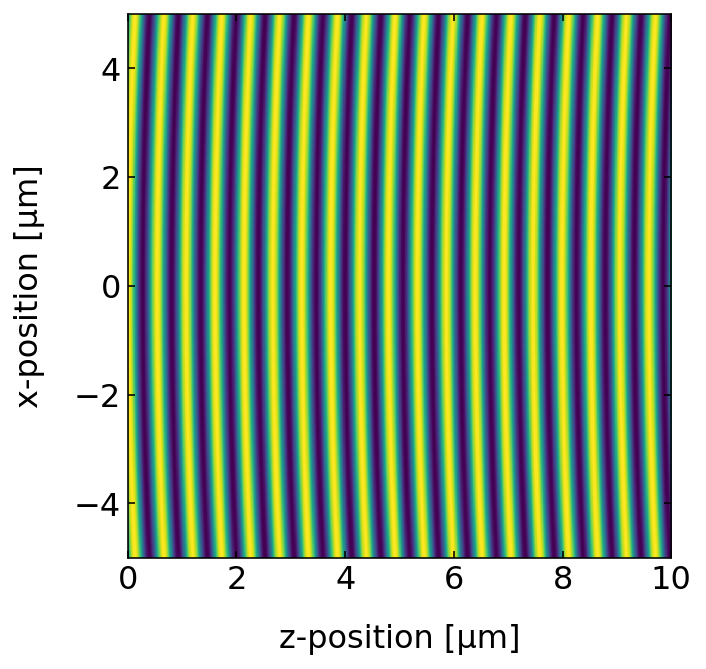

In [118]:
plt.figure(figsize=(5,5))
field=plane_wave(k,r)
phase=lens(k0,r,100e-6)
field=field*phase
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent)

plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')
plt.show()